# 星巴克毕业项目

### 简介

　　这个数据集是一些模拟 Starbucks rewards 移动 app 上用户行为的数据。每隔几天，星巴克会向 app 的用户发送一些推送。这个推送可能仅仅是一条饮品的广告或者是折扣券或 BOGO（买一送一）。一些顾客可能一连几周都收不到任何推送。 

　　顾客收到的推送可能是不同的，这就是这个数据集的挑战所在。

　　你的任务是将交易数据、人口统计数据和推送数据结合起来判断哪一类人群会受到某种推送的影响。这个数据集是从星巴克 app 的真实数据简化而来。因为下面的这个模拟器仅产生了一种饮品， 实际上星巴克的饮品有几十种。

　　每种推送都有有效期。例如，买一送一（BOGO）优惠券推送的有效期可能只有 5 天。你会发现数据集中即使是一些消息型的推送都有有效期，哪怕这些推送仅仅是饮品的广告，例如，如果一条消息型推送的有效期是 7 天，你可以认为是该顾客在这 7 天都可能受到这条推送的影响。

　　数据集中还包含 app 上支付的交易信息，交易信息包括购买时间和购买支付的金额。交易信息还包括该顾客收到的推送种类和数量以及看了该推送的时间。顾客做出了购买行为也会产生一条记录。 

　　同样需要记住有可能顾客购买了商品，但没有收到或者没有看推送。

### 示例

　　举个例子，一个顾客在周一收到了满 10 美元减 2 美元的优惠券推送。这个推送的有效期从收到日算起一共 10 天。如果该顾客在有效日期内的消费累计达到了 10 美元，该顾客就满足了该推送的要求。

　　然而，这个数据集里有一些地方需要注意。即，这个推送是自动生效的；也就是说，顾客收到推送后，哪怕没有看到，满足了条件，推送的优惠依然能够生效。比如，一个顾客收到了"满10美元减2美元优惠券"的推送，但是该用户在 10 天有效期内从来没有打开看到过它。该顾客在 10 天内累计消费了 15 美元。数据集也会记录他满足了推送的要求，然而，这个顾客并没被受到这个推送的影响，因为他并不知道它的存在。

### 清洗

　　清洗数据非常重要也非常需要技巧。

　　你也要考虑到某类人群即使没有收到推送，也会购买的情况。从商业角度出发，如果顾客无论是否收到推送都打算花 10 美元，你并不希望给他发送满 10 美元减 2 美元的优惠券推送。所以你可能需要分析某类人群在没有任何推送的情况下会购买什么。

### 最后一项建议

　　因为这是一个毕业项目，你可以使用任何你认为合适的方法来分析数据。例如，你可以搭建一个机器学习模型来根据人口统计数据和推送的种类来预测某人会花费多少钱。或者，你也可以搭建一个模型来预测该顾客是否会对推送做出反应。或者，你也可以完全不用搭建机器学习模型。你可以开发一套启发式算法来决定你会给每个顾客发出什么样的消息（比如75% 的35 岁女性用户会对推送 A 做出反应，对推送 B 则只有 40% 会做出反应，那么应该向她们发送推送 A）。


# 数据集

一共有三个数据文件：

* portfolio.json – 包括推送的 id 和每个推送的元数据（持续时间、种类等等）
* profile.json – 每个顾客的人口统计数据
* transcript.json – 交易、收到的推送、查看的推送和完成的推送的记录

以下是文件中每个变量的类型和解释 ：

**portfolio.json**
* id (string) – 推送的id
* offer_type (string) – 推送的种类，例如 BOGO、打折（discount）、信息（informational）
* difficulty (int) – 满足推送的要求所需的最少花费
* reward (int) – 满足推送的要求后给与的优惠
* duration (int) – 推送持续的时间，单位是天
* channels (字符串列表)

**profile.json**
* age (int) – 顾客的年龄 
* became_member_on (int) – 该顾客第一次注册app的时间
* gender (str) – 顾客的性别（注意除了表示男性的 M 和表示女性的 F 之外，还有表示其他的 O）
* id (str) – 顾客id
* income (float) – 顾客的收入

**transcript.json**
* event (str) – 记录的描述（比如交易记录、推送已收到、推送已阅）
* person (str) – 顾客id
* time (int) – 单位是小时，测试开始时计时。该数据从时间点 t=0 开始
* value - (dict of strings) – 推送的id 或者交易的数额


In [91]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import datetime
import pickle
import os
import re
pd.set_option("display.max_columns", 100)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score , classification_report
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# read in the json files
get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

def pklsave(model, filename):
    """
    This function is to save the sklearn object
    INPUT :
        model : sklearn object
        filename : filepath to saved
    RETURN : none
    """
    pickle.dump(model, open(filename,'wb'))
    
def pklload(filename):
    """
    This function is to load the saved sklearn object
    INPUT : filename : filepath
    RETURN : loaded sklearn object
    """
    return pickle.load(open(filename, 'rb'))


# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 概览portfolio

In [2]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [3]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


- 只有10个 offerid , 对应不同的推送活动 所以 ifficulty,duration, offer_type,reward可以合并起来 作为一个完整的推送活动名字 为 offername，后面处理的时候  offername 和 offerid 只留下一个就行
- channels 列可以做成onehot编码
    
    
- Only 10 data, so the information of 'offer_type', 'difficulty', 'duration', 'reward'  can all be seen as special content of one offer type, and can be added into one
- The channels column needs to be one-hot encoded.


In [10]:
# 函数: 对portfolio前处理，
# 思路：
# 1 onehot编码 , list_channels = ['web', 'email', 'mobile', 'social']
# 2 offername  把 ['offer_type', 'difficulty', 'duration', 'reward'] 这四个合并成一个 offername，后面处理的时候 offername和 offerid 留一个就行

def portfolio_prep(df):
    # df = portfolio
    # one hot encoded   channels 4 class
    df = df.copy()
    list_channels = ['web', 'email', 'mobile', 'social']

    for ch in list_channels:
        # ch = list_channels[0]
        df[ch] = df.channels.apply(lambda x: 1 if ch in x else 0)

    df = df.drop('channels', axis=1)

    df['offername'] = df.offer_type.astype(str) +'_'+ df.difficulty.astype(str) +'_'+ \
        df.duration.astype(str) +'_'+  df.reward.astype(str)
    
    # df = df.drop( ['offer_type', 'difficulty', 'duration', 'reward']  , axis=1)
   
    return df

In [13]:
portfolio_clean = portfolio_prep( portfolio ) 
portfolio_clean

,reward,difficulty,duration,offer_type,id,web,email,mobile,social,offername
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,bogo_10_7_10
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,bogo_10_5_10
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0,informational_0_4_0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,bogo_5_7_5
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,discount_20_10_5
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,discount_7_7_3
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,discount_10_10_2
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,informational_0_3_0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,bogo_5_5_5
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,discount_10_7_2


## 概览profile

In [14]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [15]:
profile.info()
# `became_member_on` data type is int64, need to parse to dates.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


- gender 和 income存在缺失数据   
- became_member_on 可以先转化为datetime, 在转化为用户的  became_member_year 和 member_days 特征 
- 特征工程的时候 age最好转化为年龄分组数据 以10为间隔
    
- There are some missing data for gender and income
- became_member_on can be converted to datetime first, and then converted to the user's became_member_year and member_days features
- In feature engineering, age is best converted into age grouping data with 10 intervals

### age 和 income

In [16]:
profile[['age', 'income']].describe()

,age,income
count,17000.000000,14825.000000
mean,62.531412,65404.991568
std,26.738580,21598.299410
min,18.000000,30000.000000
25%,45.000000,49000.000000
50%,58.000000,64000.000000
75%,73.000000,80000.000000
max,118.000000,120000.000000


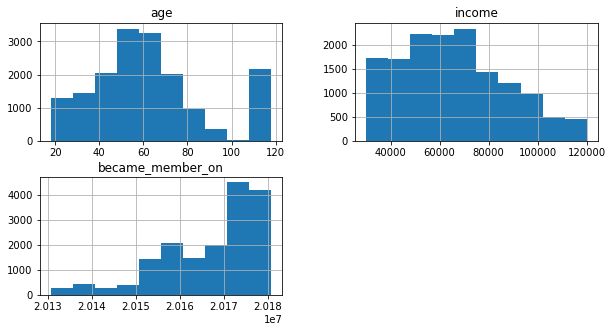

In [17]:
profile[['age', 'income', 'became_member_on']].hist(figsize=(10,5));

- age数据里 有太多118岁的 看上去不正常,总共2175人
- age和income 基本符合正态分布，became_member人数 每年逐渐增多
    
    
- to much 118 years old people (2175) in age columns, seems abnormal
- age and income basically conform to the normal distribution, the number of become_member gradually increases every year

In [18]:
profile[profile.age == 118]['age'].value_counts()  # 2175

118    2175
Name: age, dtype: int64

### 列缺失

In [19]:
profile.isnull().sum()  #  gender 2175, income 2175

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [20]:
profile[profile.age == 118][ ['gender', 'income'] ]

,gender,income
0,None,NaN
2,None,NaN
4,None,NaN
6,None,NaN
7,None,NaN
...,...,...
16980,None,NaN
16982,None,NaN
16989,None,NaN
16991,None,NaN


- 118岁的用户 在income和gender上都缺失了信息 如果不影响整体特征分布 可以考虑删除。
    
    
- Age at where 118 all missing values in income and gender columns. If it does not affect the overall feature distribution, consider delete these.

###  行缺失

In [21]:
# How much data is missing in each row of profiile  dataset?
row_null = profile.isnull().sum(axis=1)
row_null.value_counts()

0    14825
2     2175
dtype: int64

- 有2175行缺少了2个特征 占总数的14%
- There are 2175 rows missing 2 features, 14% of the total

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'no missing value')

Text(0.5, 1.0, 'with missing value')

Text(0.5, 0.98, 'Feature: age')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'no missing value')

Text(0.5, 1.0, 'with missing value')

Text(0.5, 0.98, 'Feature: became_member_on')

<AxesSubplot:>

[Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O')]

Text(0.5, 1.0, 'no missing value')

Text(0.5, 1.0, 'with missing value')

Text(0.5, 0.98, 'Feature: gender')

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'no missing value')

Text(0.5, 1.0, 'with missing value')

Text(0.5, 0.98, 'Feature: income')

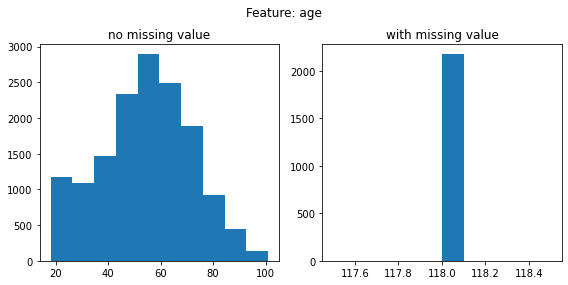

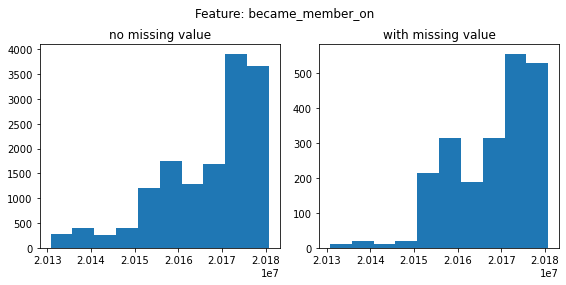

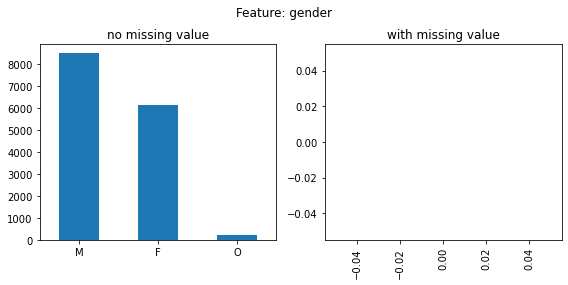

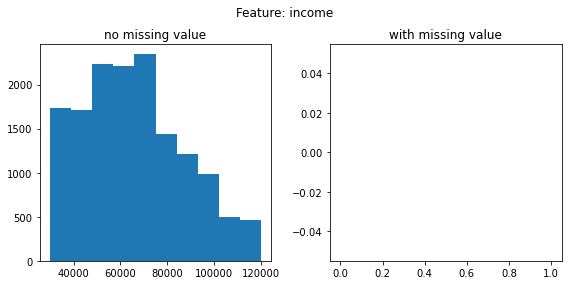

In [22]:
#%%  比较 行缺失 vs 无缺失，在各列下的分布图  有无明显差别 

profile_wonull = profile[row_null ==0]
profile_winull = profile[row_null > 0]

for col in ['age', 'became_member_on','gender', 'income']:
    # col = 'became_member_on'
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
   
    if col == 'gender':
        # col = 'gender'
        profile_wonull[col].value_counts().plot(kind='bar', ax=ax1)
        ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(),rotation=0)
        try :
            profile_winull[col].value_counts().plot(kind='bar', ax=ax2)
        except:
            pass
    else:
        profile_wonull[col].hist(ax=ax1)
        profile_winull[col].hist(ax=ax2)
    
    ax1.grid(False)
    ax2.grid(False)
    ax1.set_title('no missing value' )
    ax2.set_title('with missing value')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.85)


### 重复

In [23]:
profile.id.duplicated().sum()  # 无重复

0

### income vs gender

In [24]:
profile.gender.value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

<AxesSubplot:>

[Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O')]

Text(0.5, 1.0, 'Gender Distribution')

Text(0, 0.5, 'Count')

(array([1206., 1204., 1443., 1344., 1386.,  637.,  536.,  417.,  153.,
         158.]),
 array([ 30000.,  39000.,  48000.,  57000.,  66000.,  75000.,  84000.,
         93000., 102000., 111000., 120000.]),
 <BarContainer object of 10 artists>)

(array([498., 485., 757., 824., 932., 776., 649., 561., 345., 302.]),
 array([ 30000.,  39000.,  48000.,  57000.,  66000.,  75000.,  84000.,
         93000., 102000., 111000., 120000.]),
 <BarContainer object of 10 artists>)

(array([22., 16., 14., 37., 27., 24., 16., 21., 23., 12.]),
 array([ 30000.,  37000.,  44000.,  51000.,  58000.,  65000.,  72000.,
         79000.,  86000.,  93000., 100000.]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, '$ Income')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Income Distribution')

<AxesSubplot:xlabel='gender', ylabel='income'>

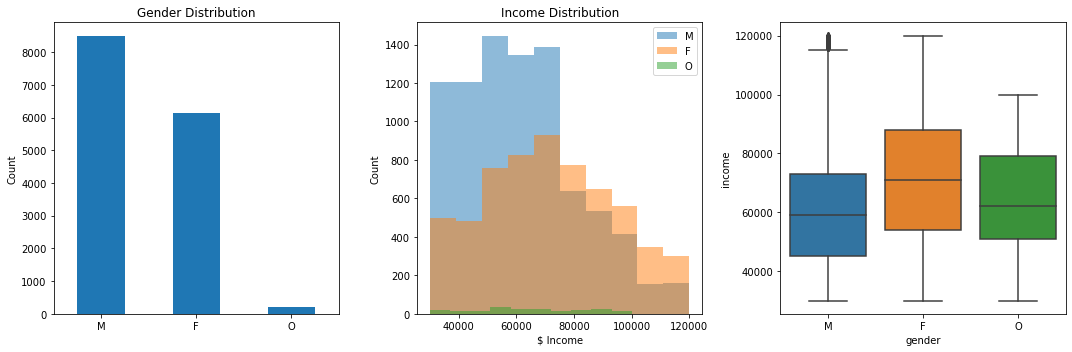

In [25]:
# 分析性别 和 income， 作图 性别count， 不同性别-income hist分布，不同性别-income box图
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,5))

# gender distribution bar
profile.gender.value_counts().plot(kind='bar', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_title('Gender Distribution')
ax1.set_ylabel('Count')

# different gender's income distribution histogram
ax2.hist(profile[profile.gender == 'M']['income'], alpha=0.5, label='M')
ax2.hist(profile[profile.gender == 'F']['income'], alpha=0.5, label='F')
ax2.hist(profile[profile.gender == 'O']['income'], alpha=0.5, label='O')
ax2.set_xlabel('$ Income')
ax2.set_ylabel('Count')
ax2.set_title('Income Distribution')
ax2.legend()

# different gender's income statics box
sns.boxplot('gender', 'income', data=profile, ax=ax3, order=['M', 'F', 'O'])

plt.tight_layout()


- 男性人数较多 女性其次 还有212个没有性别的
- 女性平均收入较高 其次是无性别的 
  
  
- There are more men than women, and 212 people with no gender imfornation.
- Women's average income is higher, followed by genderless

- 对于缺失数据的行，在　became_member_on这个特征上和无缺失行　没有明显的分布规律差别,可以删除
- For rows with missing data, there is no obvious difference in the distribution pattern of "became_member_on" with no missing rows. These rows can be deleted.

### 转换时间类型

In [26]:
def profile_prep_dates(df):
    # df = profile
    df = df.copy()
    #convert to string
    df['became_member_on'] = pd.to_datetime( df.became_member_on.apply(lambda x: str(x)) )
    return df

profile_clean = profile_prep_dates( profile )

## 概览 Transcript

In [27]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [28]:
transcript.sample(20)

,person,event,value,time
220005,445649ee453c4633a1e6af2b38d90881,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},510
159204,b56e747d7f6641c88cacc52c5eaebf57,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
162177,dc82a269318741b18aa62b0be37a155a,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},408
202721,7a5f624f754d4fceb346887164425f1d,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},504
215927,388bda1fea454949abd8d927b04cbd6b,offer completed,{'offer_id': '0b1e1539f2cc45b7b9fa7c272da2e1d7...,504
14121,347a75e83b70480ba7b53c7f737ebb4a,transaction,{'amount': 7.44},0
218410,3a1242dda16248728e350c4bdeb21972,transaction,{'amount': 31.41},510
164272,28b3a891cbfa45b1b4f242a8ae561cca,transaction,{'amount': 2.98},408
65228,fb0737a6629b4f5bade477a2f944543c,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},168
10162,39932598278d4ebdbba91d6e0786aa07,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0


In [29]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


### 缺失

In [30]:
transcript.isnull().sum()  # no null

person    0
event     0
value     0
time      0
dtype: int64

###  event 和 value

In [31]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [32]:
transcript.value.sample(20)

206197     {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
279243    {'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...
144980                                    {'amount': 22.63}
13453      {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
249268     {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
260449     {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
172279                                     {'amount': 3.03}
39101                                     {'amount': 15.31}
13468      {'offer id': '3f207df678b143eea3cee63160fa8bed'}
290957     {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
263097     {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
199841    {'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...
306224                                     {'amount': 3.34}
92001                        {'amount': 3.5700000000000003}
155927     {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
146622                                    {'amount': 22.59}
203692     {'offer id': '9b98b8c7a33c4b6

- value 列有两种情况 'offer id' 或者'offer_id' 字典，值为offerid，'amount'字典，值为交易量，因此这一列需要拆成2列，分别用'offer_id'和'amount'作为列名，值为对应的字典值，注意需要把'offer id'变为'offer_id'

- event 列有4种活动，其中 offer received, offer viewed and offer completed 都是和 offer 有关 对应了value列的'offer id'，transaction 对应了value列的'amount'

    
- value column has two types, one is dict of 'offer id' and 'offer_id'!!!!!!!!!!! the other is dict of 'amount'
- event column has two types, one is offer received, viewed and completed, the other is transaction
- event transaction corresponds to value amount, and other event offer actions corresponds to value offer_id.
- dict of 'offer id'and 'offer_id' can get a new column named 'offer id' in the row of offer event
- dict of 'amount' can get a new column named 'amount' in the row of transaction

In [33]:
transcript.person.unique().shape

(17000,)

### 增加两列 offer_id  and  amount 

In [34]:

def encode_offer_id(x):
    try :
        return x['offer id']
    except:
        return x['offer_id']

def transcript_prep(df):
    # df = transcript
    trans_df = df.copy()
    trans_df['offer_id'] = trans_df[~trans_df.event.isin(['transaction'])].value.apply(encode_offer_id)   # why can't lambda?
    trans_df['amount'] =  trans_df[trans_df.event.isin(['transaction'])].value.apply(lambda x: x['amount'])
    trans_df = trans_df.drop( 'value' , axis=1 )
    return trans_df

In [35]:
transcript_try = transcript_prep(transcript)
transcript_try.sample(10)

,person,event,time,offer_id,amount
303283,3a1747f3e741449387bb614da8e0171c,transaction,702,NaN,22.38
201703,348bdc19d65f49b8b98f72c59e64cd89,offer received,504,fafdcd668e3743c1bb461111dcafc2a4,NaN
204260,0eb51351d07c4bdba4ed8db8b3fb2392,offer received,504,fafdcd668e3743c1bb461111dcafc2a4,NaN
97035,a142691e2215486db5b56ec3bb5f91d7,transaction,258,NaN,28.09
110299,a86a6c3923a5435486301ed5033ee4dd,offer completed,330,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
297061,ecb591a8efae462c9f24f5a36aa4a541,transaction,672,NaN,0.61
247032,34fe7c1f20874ccc81e2c4506407fa72,offer received,576,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN
113276,8614aba093c549c9a9d38e212588763b,offer received,336,3f207df678b143eea3cee63160fa8bed,NaN
130364,932901765c30419a932442a4248f239c,transaction,348,NaN,13.09
265415,38ea624a365d479c8ddf28c5492ba136,transaction,582,NaN,2.69


## 三个合并  profile， portfolio， transcript  


In [36]:
print( portfolio_clean.columns) 
print( profile_clean.columns )
print( transcript.columns )

Index(['reward', 'difficulty', 'duration', 'offer_type', 'id', 'web', 'email',
       'mobile', 'social', 'offername'],
      dtype='object')
Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')
Index(['person', 'event', 'value', 'time'], dtype='object')


In [37]:
def merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df):
    # transcript_df= transcript ; profile_df = profile; portfolio_df = portfolio
    portfolio_clean = portfolio_prep( portfolio_df ) 
    profile_clean = profile_prep_dates(profile_df)
    transcript_clean = transcript_prep(transcript_df)
    
    dfmerge_tr_pr = pd.merge(transcript_clean, profile_clean, left_on=['person'], right_on = ['id'], how ='left')
    dfmerge_tr_pr = dfmerge_tr_pr.drop(['id'], axis=1)
    
    dfmerge_trpr_po =  pd.merge(dfmerge_tr_pr, portfolio_clean, left_on = 'offer_id', right_on ='id', how='left')
    dfmerge_trpr_po = dfmerge_trpr_po.drop(['id'], axis=1)
    return dfmerge_trpr_po

In [38]:
dfmerge_trprpo = merge_transcript_profile_portfolio(transcript, profile, portfolio)

In [39]:
dfmerge_trprpo.head()

,person,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,web,email,mobile,social,offername
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,bogo_5_7_5
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,2017-08-04,NaN,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0,discount_20_10_5
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,70000.0,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0,discount_10_7_2
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,2017-09-25,NaN,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0,discount_10_10_2
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,2017-10-02,NaN,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_10_5_10


### 缺失

In [40]:
dfmerge_trprpo.isnull().sum()

person                   0
event                    0
time                     0
offer_id            138953
amount              167581
gender               33772
age                      0
became_member_on         0
income               33772
reward              138953
difficulty          138953
duration            138953
offer_type          138953
web                 138953
email               138953
mobile              138953
social              138953
offername           138953
dtype: int64

## 数据探索

### amount 平均，总数 ， 次数

<AxesSubplot:>

Text(0.5, 0, '$ Spending')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Average Spending per customer')

count    16578.000000
mean        13.680266
std         16.056763
min          0.050000
25%          3.181392
50%         11.996607
75%         20.469643
max        451.470000
Name: amount, dtype: float64

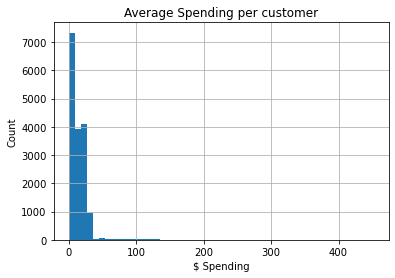

In [41]:
# 所有用户用户的 交易情况 amount 平均值分布
dfmerge_trprpo.groupby('person')['amount'].mean().hist(bins=50)
plt.xlabel('$ Spending')
plt.ylabel('Count')
plt.title('Average Spending per customer')
dfmerge_trprpo.groupby('person')['amount'].mean().describe()

<AxesSubplot:>

Text(0.5, 0, '$ Spending')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'TOTAL Spending per customer')

count    17000.000000
mean       104.438351
std        125.922619
min          0.000000
25%         21.820000
50%         69.405000
75%        148.782500
max       1608.690000
Name: amount, dtype: float64

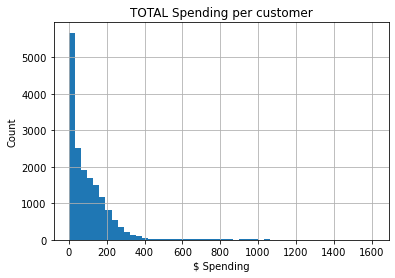

In [42]:
# 所有用户的 交易情况 amount 总和分布

dfmerge_trprpo.groupby('person')['amount'].sum().hist(bins=50)
plt.xlabel('$ Spending')
plt.ylabel('Count')
plt.title('TOTAL Spending per customer')
dfmerge_trprpo.groupby('person')['amount'].sum().describe()

<AxesSubplot:>

Text(0.5, 0, 'Number of transaction')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'The distribution of Number of transaction per customer')

count    17000.000000
mean         8.173706
std          5.116250
min          0.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         36.000000
Name: amount, dtype: float64

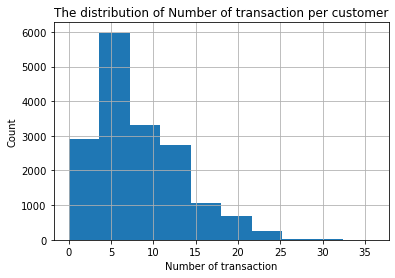

In [43]:
# 所有用户的 交易情况 amount  count 分布

dfmerge_trprpo.groupby('person')['amount'].count().hist()
plt.xlabel('Number of transaction')
plt.ylabel('Count')
plt.title('The distribution of Number of transaction per customer')
dfmerge_trprpo.groupby(['person'])['amount'].count().describe()


- 用户单次交易的平均值是16元，大部分都在20元以下
- 用户交易量的平均值是125元，大部分都在150元以下
- 用户交易次数的平均值是8次，大部分都在11次以下
    

- The average value of a user's single transaction is 16 yuan, most of which are below 20 yuan
- The average value of a user's total transaction is 125 yuan, most of which are below 150 yuan
- The average value of a user's transactions count is 8, and most of them are below 11


### amount vs gender

In [44]:
# assign missing value in gender with 'U' value
dfmerge_temp = dfmerge_trprpo.copy()
dfmerge_temp.loc[dfmerge_temp.gender.isnull(), 'gender'] ='U'

' The number of transaction by GENDER '

<AxesSubplot:xlabel='gender'>

[Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O'), Text(3, 0, 'U')]

Text(0, 0.5, 'The average spending of transaction')

Text(0.5, 1.0, 'The avg spending of transaction')

<AxesSubplot:xlabel='gender'>

[Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O'), Text(3, 0, 'U')]

Text(0, 0.5, 'The average number of transaction')

Text(0.5, 1.0, 'The avg number of transaction')

<AxesSubplot:xlabel='gender'>

[Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O'), Text(3, 0, 'U')]

Text(0, 0.5, 'The total spending of transaction')

Text(0.5, 1.0, 'The total spending of transaction')

<AxesSubplot:>

[Text(0, 0, 'M'), Text(1, 0, 'F'), Text(2, 0, 'O'), Text(3, 0, 'U')]

Text(0.5, 1.0, 'Gender Distribution')

Text(0.5, 0, 'gender')

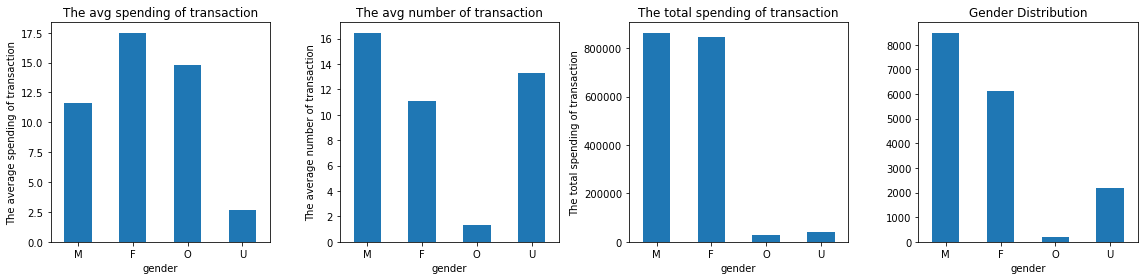

In [45]:
# 分析  不同性别-用户的 交易情况 amount 平均值 分布， 以及 不同性别-用户的  amount 计数，  不同性别-用户的  income box图

""" The number of transaction by GENDER """

#plot avg spending
f, (ax1, ax2, ax3 , ax4) = plt.subplots(1,4, figsize=(16,4))
dfmerge_temp.groupby('gender')['amount'].mean()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax1);
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_ylabel("The average spending of transaction")
ax1.set_title('The avg spending of transaction')

# plot avg number of transaction

dfmerge_temp.groupby(['gender', 'amount'])['amount'].count().mean(level=0)[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax2);
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=0);
ax2.set_ylabel("The average number of transaction");
ax2.set_title("The avg number of transaction");

# boxplot income distribution
dfmerge_temp.groupby('gender')['amount'].sum().plot(kind='bar', ax=ax3);
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=0);
ax3.set_ylabel("The total spending of transaction");
ax3.set_title("The total spending of transaction");

#plot gender distribution
profile.fillna('U').gender.value_counts()[['M', 'F', 'O', 'U']].plot(kind='bar', ax=ax4)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
plt.title('Gender Distribution');
ax4.set_xlabel('gender')

plt.tight_layout()

- 女性的平均交易量最多, 其次是其他性别和男性
- 男性的交易次数最多, 其次是其他性别和女性
- 男性女性的总交易量比较接近,可能是因为男性虽然单次交易量少,但是人数多.其他性别和unknown的总交易量都很少
    
    
- Women have the most average spending, followed by other genders and men
- Men have the most average transaction count, followed by other genders and women
- The total spending of males and females is relatively close, which may be due to the fact that although the males' single transaction spending is small, the number of males is large.The total spending of other genders and unknown is very small

### offer event count

'\nPortfolio Distribution by event\n'

<Figure size 432x432 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='offername'>

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0, 0.5, 'Portfolio Name')

Text(0.5, 1.0, 'Portfolio Distribution by Event')

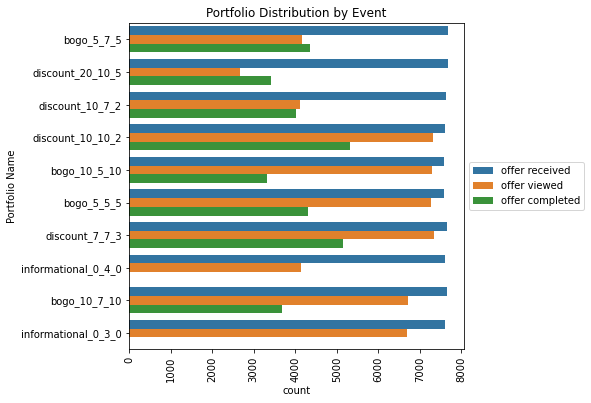

In [46]:
# 分析 查看不同offer 的 receive view 和 complete 数量，水平图

"""
Portfolio Distribution by event
"""
df_offerevent = dfmerge_trprpo[~dfmerge_trprpo.event.isin(['transaction'])]
plt.figure(figsize=(6,6))
sns.countplot(y='offername', hue='event', data= df_offerevent);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)
plt.ylabel("Portfolio Name")
plt.title("Portfolio Distribution by Event")

# 发现 complete 竟然比 view还多 说明有的人 complete 和推荐无关 属于无效记录


-  对于bogo_5_7_5和discount_20_10_5这两种推送，complete 竟然比 view还多 说明有的人 complete 和推送无关, 属于无效记录
    
    
- For push offers bogo_5_7_5 and discount_20_10_5, complete count is even more than view count, indicating that some complete event has nothing to do with push offers,these are invalid records


<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='0', ylabel='offername'>

Text(0.5, 1.0, 'Before Cleaning : Offer Received, Viewed, and Completed (fraction)')

Text(0, 0.5, '')

Text(0.5, 0, 'Fraction')

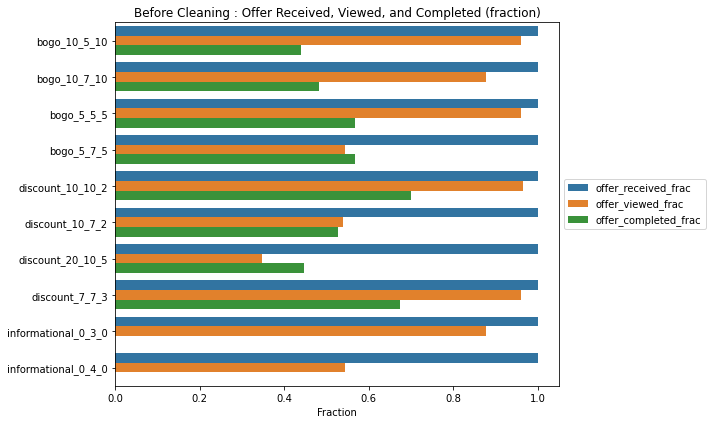

In [47]:
# 分析 查看不同offer的比例  receive view 和 complete 数量 / receive数量，水平图

event_count = dfmerge_trprpo[~dfmerge_trprpo.event.isin(['transaction'])].groupby(['offername', 'event']).offer_id.count().unstack()
event_count['offer_received_frac'] = event_count['offer received']/ event_count['offer received']
event_count['offer_viewed_frac'] = event_count['offer viewed']/ event_count['offer received']
event_count['offer_completed_frac'] =  event_count['offer completed']/ event_count['offer received']

event_count_frac = event_count[['offer_received_frac','offer_viewed_frac', 'offer_completed_frac']]

event_count_stack = event_count_frac.stack().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=0,y='offername', hue='event', data=event_count_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(top=0.8)
plt.title("Before Cleaning : Offer Received, Viewed, and Completed (fraction)")
plt.ylabel('')
plt.xlabel('Fraction')

plt.tight_layout()

### find invalid transaction 

#### 函数 find_invalid 找到有效. 无效完成


In [48]:
# 测试
df_merg = dfmerge_trprpo.copy()
portfolio_df = portfolio

# 
# 思路：
#  对买个用于进行迭代，看看用户有哪些offer活动 
# 然后对每个用户 每个offer活动迭代，看看这个offer是否有 revieve view 以及 complete
#  有view同时 ， complete 又在活动 receive 时间范围内，标记为 valid complete
# 对于其他complete 标记为 invalid complete

list_person = df_merg.person.unique()
list_validcomp = [];  list_invalidcomp = [] ; 

for person_id in tqdm( list_person ) :
    # person_id= list_person[0]
    # person_id = '88baa20c29a94178a43a7d68e5f039d4'
    df_sub_person = dfmerge_trprpo[dfmerge_trprpo.person == person_id]
    list_psn_ofr = df_sub_person.offer_id.unique()
    list_psn_ofr = list_psn_ofr[ ~pd.isna(list_psn_ofr) ] 
    
    for psn_ofr_id in list_psn_ofr:
#         psn_ofr_id  = list_psn_ofr[0]
#  psn_ofr_id = '0b1e1539f2cc45b7b9fa7c272da2e1d7'
        df_sub_psn_ofr  = df_sub_person[df_sub_person.offer_id == psn_ofr_id ]
        tj_rec =  'offer received'  in df_sub_psn_ofr.event.values
        tj_view =  'offer viewed'  in df_sub_psn_ofr.event.values
        tj_comp =  'offer completed'  in df_sub_psn_ofr.event.values
        # 对于每个收到的
        if tj_rec == True:
            starttime = df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer received' ].time.values.min()
            duringtime  = portfolio_df[ portfolio_df.id ==  psn_ofr_id ].duration.values[0] *24
            endtime = starttime+ duringtime
            index_rec =  df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer received' ].time.idxmin()
            # 对于收到且完成了的
            if tj_comp ==True:
                comptime = df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer completed' ].time.values.min()
                # 记录这个行号
                index_comp = df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer completed' ].time.index.values
                
                # 对于收到完成  且在规定时间 且已经查看了的
                if comptime <= endtime and tj_view == True:
                    list_validcomp.extend( index_comp)
                else:
                    list_invalidcomp.extend( index_comp)
#             # 对于收到且没完成的
#             else :
#                     df_valid_1.loc[ 0 ,:]  =     [ person_id, psn_ofr_id, 'no_complete' , index_rec ]   


100%|████████████████████████████████████| 17000/17000 [09:28<00:00, 29.90it/s]


In [49]:
# 输入 ； 合并后的数据 df_merg，以及合并前包含offer持续时间的offer数据  portfolio_df
# 输出 ：  df_merg 中所有有效offer完成 （单个用户 某个offer 看过的前提下 完成了）
# 和无效offer完成的 index （单个用户 某个offer 没看过就完成了）， 
# 分别为 list_validcomp 和 list_invalidcomp
def find_valid( df_merg , portfolio_df ):

    list_person = df_merg.person.unique()
    list_validcomp = [];  list_invalidcomp = [] ; list_validrec = []

    for person_id in tqdm( list_person ) :
        # person_id= list_person[0] ; person_id = '88baa20c29a94178a43a7d68e5f039d4'
        df_sub_person = dfmerge_trprpo[dfmerge_trprpo.person == person_id]
        list_psn_ofr = df_sub_person.offer_id.unique()
        list_psn_ofr = list_psn_ofr[ ~pd.isna(list_psn_ofr) ] 

        for psn_ofr_id in list_psn_ofr:
    #       psn_ofr_id  = list_psn_ofr[1] ; psn_ofr_id = '0b1e1539f2cc45b7b9fa7c272da2e1d7'
            df_sub_psn_ofr  = df_sub_person[df_sub_person.offer_id == psn_ofr_id ]
            tj_rec =  'offer received'  in df_sub_psn_ofr.event.values
            tj_view =  'offer viewed'  in df_sub_psn_ofr.event.values
            tj_comp =  'offer completed'  in df_sub_psn_ofr.event.values
            # 对于每个收到的
            if tj_rec == True:
                starttime = df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer received' ].time.values.min()
                duringtime  = portfolio_df[ portfolio_df.id ==  psn_ofr_id ].duration.values[0] *24
                endtime = starttime+ duringtime
                # 最早收到offer的行号
                index_rec =  df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer received' ].time.idxmin()
                # 对于收到且完成了的
                if tj_comp ==True:
                    # 完成时间
                    comptime = df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer completed' ].time.values.min()
                    # 完成offer的行号
                    index_comp = df_sub_psn_ofr[ df_sub_psn_ofr.event ==  'offer completed' ].index.values
                    # 对于在规定时间内完成的 且已经查看了的
                    if comptime <= endtime and tj_view == True:
                        # 记录 完成offer的行号
                        list_validcomp.extend( index_comp)
                        # 记录 完成时间之前的所有receive的行号
                        list_validrec.append( index_rec )
                    else:
                        list_invalidcomp.extend( index_comp )

    return list_validcomp, list_invalidcomp, list_validrec

In [50]:

if  os.path.exists('sav/list_validcomp.pkl') and os.path.exists('sav/list_validcomp.pkl') and os.path.exists('sav/list_validrec.pkl'):
    list_validcomp =  pklload('sav/list_validcomp.pkl')
    list_invalidcomp =  pklload('sav/list_invalidcomp.pkl')
    list_validrec =  pklload('sav/list_validrec.pkl')

else:    
    list_validcomp, list_invalidcomp ,list_validrec =   find_valid( dfmerge_trprpo , portfolio )
#     list_validcomp
    pklsave(list_validcomp, 'sav/list_validcomp.pkl')
    pklsave(list_invalidcomp, 'sav/list_invalidcomp.pkl')
    pklsave(list_validrec, 'sav/list_validrec.pkl')

In [51]:
# list_validcomp 和 list_validrec是不是长度一样？
len( list_validcomp ) 
len( list_validrec ) 
# list_validcomp比较多 说明有的人 有效完成次数不止一次

27601

23421

In [52]:
# 给 dfmerge_trprpo 增加一列  valid_complete,  valid为1 ，invalid 和 no_complete都为0
dfmerge_trprpo.loc[ : ,'valid'] = 0
dfmerge_trprpo.loc[ list_validcomp ,'valid'] =1
dfmerge_trprpo.loc[ : ,'invalid'] = 0
dfmerge_trprpo.loc[ list_invalidcomp ,'invalid'] =1
dfmerge_trprpo

,person,event,time,offer_id,amount,gender,age,became_member_on,income,reward,difficulty,duration,offer_type,web,email,mobile,social,offername,valid,invalid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,bogo_5_7_5,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,2017-08-04,NaN,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0,discount_20_10_5,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,70000.0,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0,discount_10_7_2,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,2017-09-25,NaN,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0,discount_10_10_2,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,2017-10-02,NaN,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_10_5_10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,M,66,2018-01-01,47000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,M,52,2018-04-08,62000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,F,63,2013-09-22,52000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,M,57,2016-07-09,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


### 去掉 invalid_complete以后  再对offer_event count进行作图

<Figure size 720x432 with 0 Axes>

<AxesSubplot:xlabel='0', ylabel='offername'>

Text(0.5, 1.0, 'Before Cleaning : Offer Received, Viewed, and Completed (fraction)')

Text(0, 0.5, '')

Text(0.5, 0, 'Fraction')

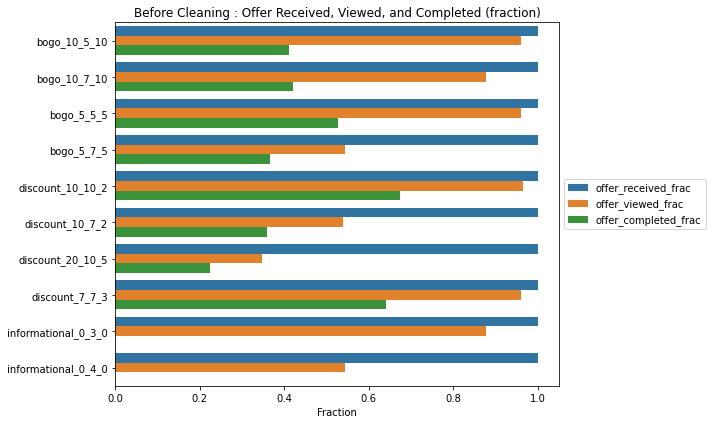

In [53]:
#%% 去掉无效行以后 重新统计  不同offer- receive view 和 complete 比例，水平图

df_trprpo_valid = dfmerge_trprpo[ dfmerge_trprpo.invalid == 0 ]

event_count = df_trprpo_valid[~df_trprpo_valid.event.isin(['transaction'])].groupby(['offername', 'event']).offer_id.count().unstack()
event_count['offer_received_frac'] = event_count['offer received']/ event_count['offer received']
event_count['offer_viewed_frac'] = event_count['offer viewed']/ event_count['offer received']
event_count['offer_completed_frac'] =  event_count['offer completed']/ event_count['offer received']

event_count_frac = event_count[['offer_received_frac','offer_viewed_frac', 'offer_completed_frac']]

event_count_stack = event_count_frac.stack().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x=0,y='offername', hue='event', data=event_count_stack)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplots_adjust(top=0.8)
plt.title("Before Cleaning : Offer Received, Viewed, and Completed (fraction)")
plt.ylabel('')
plt.xlabel('Fraction')

plt.tight_layout()

- 对于所有推送offer 发现 complete 比 view 少，说明只剩下了有效记录
    
    
- For all push offers, it is found that complete is less than view, indicating that only valid records are left

# 函数集合

## 清理信息， 合并

In [54]:
# 函数 portfolio_prep 
# 输入 没有清洗以前的 portfolio
# 输出  处理后的 portfolio
# 对 channels onehot, 
# 把 offer_type difficulty duration reward 合并为一个offername，
def portfolio_prep(df):
    # df = portfolio
    # one hot encoded   channels 4 class
    df = df.copy()
    list_channels = ['web', 'email', 'mobile', 'social']

    for ch in list_channels:
        # ch = list_channels[0]
        df[ch] = df.channels.apply(lambda x: 1 if ch in x else 0)

    df = df.drop('channels', axis=1)

    df['offername'] = df.offer_type.astype(str) +'_'+ df.difficulty.astype(str) +'_'+ \
        df.duration.astype(str) +'_'+  df.reward.astype(str)
    
#     df = df.drop( ['offer_type', 'difficulty', 'duration', 'reward']  , axis=1)
    return df


# 输入 原始 profile
# 输出  处理后的 profile
# 1 对 became_member_on 转化为时间类型，然后提取 year ，转化onehot
# 2 用户年龄分组  10为一组
def profile_prep(df):
    # df = profile
    df = df.copy()
    #convert to string
    df['became_member_on'] = pd.to_datetime( df.became_member_on.apply(lambda x: str(x)) )
    df[ 'member_year'] = df['became_member_on'].apply(lambda x: 'mbyr_'+ str(x.year) )
    df = pd.concat( [ df , pd.get_dummies(df['member_year'])] ,axis= 1 ) 
    
    min_age_limit = np.int(np.floor(np.min(df['age'])/10)*10)
    max_age_limit = np.int(np.ceil(np.max(df['age'])/10)*10)

    df['agerange'] =pd.cut(df['age'], (range(min_age_limit,max_age_limit + 10, 10)),right=False)

    df['agerange'] = df['agerange'].astype('str')

    df = pd.concat( [ df , pd.get_dummies(df['agerange'])] ,axis= 1 ) 
    df =df.drop(columns=['agerange'])
    return df

def encode_offer_id(x):
    try :
        return x['offer id']
    except:
        return x['offer_id']

# 输入 没有处理以前的  transcript
# 输出 处理以后的 transcript， value列转化为另外两列 offer_id  amount
# 思路
# 1  把 event列中 transaction以外的 对应的字典，要么是 x['offer id']  或者x['offer_id']  放到 offer_id这一列里
# 2  把 event列中 transaction 对应的字典，x['amount'] 放到 amount 这一列里
# 3 删除原来的value
def transcript_prep(df):
    # df = transcript
    trans_df = df.copy()
    trans_df['offer_id'] = trans_df[~trans_df.event.isin(['transaction'])].value.apply(encode_offer_id)   # why can't lambda?
    trans_df['amount'] =  trans_df[trans_df.event.isin(['transaction'])].value.apply(lambda x: x['amount'])
    trans_df = trans_df.drop( 'value' , axis=1 )
    return trans_df

# 输入 3个原始df
# 输出 清洗后的3个df ，根据用户id和offerid  合并起来
def merge_transcript_profile_portfolio(transcript_df, profile_df, portfolio_df):
    # transcript_df= transcript ; profile_df = profile; portfolio_df = portfolio
    portfolio_clean = portfolio_prep( portfolio_df ) 
    profile_clean = profile_prep(profile_df)
    transcript_clean = transcript_prep(transcript_df)
    
    dfmerge_tr_pr = pd.merge(transcript_clean, profile_clean, left_on=['person'], right_on = ['id'], how ='left')
    dfmerge_tr_pr = dfmerge_tr_pr.drop(['id'], axis=1)
    
    dfmerge_trpr_po =  pd.merge(dfmerge_tr_pr, portfolio_clean, left_on = 'offer_id', right_on ='id', how='left')
    dfmerge_trpr_po = dfmerge_trpr_po.drop(['id'], axis=1)
    return dfmerge_trpr_po





##  特征提取

In [55]:
#%% 函数  根据amount提取消费信息
# 输入 某个用户的 id 和 用户子df
# 输出  这个用户名 命名的ser 消费的 关于平均 计数 总值
def addfeat_spending(df, profile_id):
    # profile_id = dfmerge_trprpo.person.unique()[0] ; 
    # df = dfmerge_trprpo[ dfmerge_trprpo.person ==  profile_id]  ; 
    avg_spending = df.amount.mean()
    transaction_count = df.amount.count()
    sum_spending = df.amount.sum()

    spending_series = pd.Series([avg_spending, transaction_count, sum_spending], \
                                index=["avg_spending", "transaction_count", 'sum_spending'], name=profile_id)
    return spending_series

# 输入 某个用户的 id 和 用户子df
# 输出 这个用户 有效完成和无效完成  对于两种 offer_type ：bogo  discount ，的次数
def addfeat_invalid( df , profile_id):
    # profile_id = dfmerge_trprpo.person.unique()[0] ; 
    # df = dfmerge_trprpo[ dfmerge_trprpo.person ==  profile_id]  ; 
    #  df  = subset_df.copy()
    valid_bogo_count = len(df[ (df.valid == 1) &  (df.offer_type == 'bogo')])
    invalid_bogo_count = len(df[ (df.invalid == 1 ) &  (df.offer_type == 'bogo')])
    valid_dscut_count = len(df[ (df.valid == 1) &  (df.offer_type == 'discount')])
    invalid_dscut_count = len(df[ ( df.invalid == 1)  &  (df.offer_type == 'discount') ])
    valid_series = pd.Series([valid_bogo_count , invalid_bogo_count , valid_dscut_count ,invalid_dscut_count], 
                             index=[ 'valid_bogo_count','invalid_bogo_count',
                                    'valid_dscut_count' , 'invalid_dscut_count'], 
                             name=profile_id)
    return valid_series


def load_file(filepath):
    """Load file csv"""
    df_clean = pd.read_csv(filepath)
    df_clean = df_clean.set_index(df_clean.columns[0])
    df_clean = profile_parse_dates(df_clean)
    return df_clean

# 函数，特征提取
# 输入   合并后的信息 df_merge。 以及 处理以后的用户信息 df_prof_clean
# 输出  给用户信息增加更多特征
# 思路 1 对 df_merge里 每个用户遍历，得到用户子df
# 2 用之前的函数 建立用户特征 series
# 3 Ser转置为一行 和原来的 df_prof_clean 通过id 连接到一起
# 4 更新后的用户 profile_updated 存起来
def feature_extraction( df_merge, df_prof_clean):

    # df_merge = dfmerge_trprpo ; profile_df = profile
    try:
        profile_updated = load_file('data/profile_updated.csv')
        print("The profile_updated.csv file is available at local folder.")
    except:
        
        list_addfeat = ["avg_spending", "transaction_count", 'sum_spending',
                       'valid_bogo_count','invalid_bogo_count','valid_dscut_count' , 'invalid_dscut_count']
        allfeat_df = pd.DataFrame(index=list_addfeat)

        ar_personid = df_merge.person.unique()
        for profile_id in tqdm( ar_personid ):
            # profile_id = ar_personid[0]
            subset_df = df_merge[df_merge.person == profile_id]
            
            # 特征提取 消费信息 和无效完成信息
            spending_series = addfeat_spending( subset_df, profile_id )
            allfeat_df.loc[ spending_series.index , profile_id ] = spending_series.values
            invalid_series  = addfeat_invalid(  subset_df, profile_id ) 
            allfeat_df.loc[ invalid_series.index , profile_id] = invalid_series.values     
            
        # df concatenation
        profile_updated = pd.concat([df_prof_clean.set_index('id'),allfeat_df.T ], axis=1, sort=False)

    return profile_updated




# 特征工程

## 增加特征

In [56]:

# 合并
dfmerge_trprpo = merge_transcript_profile_portfolio(transcript, profile, portfolio)
# 找到并排除 invalid
dfmerge_trprpo.loc[ : ,'valid'] = 0
dfmerge_trprpo.loc[ list_validcomp ,'valid'] =1
dfmerge_trprpo.loc[ : ,'invalid'] = 0
dfmerge_trprpo.loc[ list_invalidcomp ,'invalid'] =1
dfmerge_trprpo.loc[ list_invalidcomp ,'invalid'] =1

dfmerge_trprpo



,person,event,time,offer_id,amount,gender,age,became_member_on,income,member_year,mbyr_2013,mbyr_2014,mbyr_2015,mbyr_2016,mbyr_2017,mbyr_2018,"[10, 20)","[100, 110)","[110, 120)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)",reward,difficulty,duration,offer_type,web,email,mobile,social,offername,valid,invalid
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,F,75,2017-05-09,100000.0,mbyr_2017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5.0,5.0,7.0,bogo,1.0,1.0,1.0,0.0,bogo_5_7_5,0,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,None,118,2017-08-04,NaN,mbyr_2017,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,5.0,20.0,10.0,discount,1.0,1.0,0.0,0.0,discount_20_10_5,0,0
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5,NaN,M,68,2018-04-26,70000.0,mbyr_2018,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,2.0,10.0,7.0,discount,1.0,1.0,1.0,0.0,discount_10_7_2,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,fafdcd668e3743c1bb461111dcafc2a4,NaN,None,118,2017-09-25,NaN,mbyr_2017,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2.0,10.0,10.0,discount,1.0,1.0,1.0,1.0,discount_10_10_2,0,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,None,118,2017-10-02,NaN,mbyr_2017,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,10.0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,bogo_10_5_10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,NaN,1.59,M,66,2018-01-01,47000.0,mbyr_2018,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,NaN,9.53,M,52,2018-04-08,62000.0,mbyr_2018,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
306531,a00058cf10334a308c68e7631c529907,transaction,714,NaN,3.61,F,63,2013-09-22,52000.0,mbyr_2013,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,NaN,3.53,M,57,2016-07-09,40000.0,mbyr_2016,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [57]:

if  os.path.exists('sav/profile_updated.pkl') :
    profile_updated =  pklload('sav/profile_updated.pkl')

else:    
    # 利用 valid 数据做特征提取
    df_prof_clean  = profile_prep(profile)
    profile_updated = feature_extraction( dfmerge_trprpo, df_prof_clean )    
    # saving
    profile_updated.to_csv('data/profile_updated.csv')


In [58]:
profile_updated

,gender,age,became_member_on,income,member_year,mbyr_2013,mbyr_2014,mbyr_2015,mbyr_2016,mbyr_2017,mbyr_2018,"[10, 20)","[100, 110)","[110, 120)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)",avg_spending,transaction_count,sum_spending,valid_bogo_count,invalid_bogo_count,valid_dscut_count,invalid_dscut_count
68be06ca386d4c31939f3a4f0e3dd783,None,118,2017-02-12,NaN,mbyr_2017,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,2.266667,9.0,20.40,0.0,0.0,2.0,0.0
0610b486422d4921ae7d2bf64640c50b,F,55,2017-07-15,112000.0,mbyr_2017,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,25.670000,3.0,77.01,0.0,1.0,0.0,0.0
38fe809add3b4fcf9315a9694bb96ff5,None,118,2018-07-12,NaN,mbyr_2018,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,2.383333,6.0,14.30,0.0,0.0,0.0,0.0
78afa995795e4d85b5d9ceeca43f5fef,F,75,2017-05-09,100000.0,mbyr_2017,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,22.752857,7.0,159.27,3.0,0.0,0.0,0.0
a03223e636434f42ac4c3df47e8bac43,None,118,2017-08-04,NaN,mbyr_2017,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1.550000,3.0,4.65,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,F,45,2018-06-04,54000.0,mbyr_2018,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2.861429,7.0,20.03,0.0,0.0,0.0,0.0
2cb4f97358b841b9a9773a7aa05a9d77,M,61,2018-07-13,72000.0,mbyr_2018,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,3.710000,7.0,25.97,0.0,1.0,0.0,0.0
01d26f638c274aa0b965d24cefe3183f,M,49,2017-01-26,73000.0,mbyr_2017,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,4.967500,8.0,39.74,0.0,0.0,0.0,0.0
9dc1421481194dcd9400aec7c9ae6366,F,83,2016-03-07,50000.0,mbyr_2016,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,13.547857,14.0,189.67,3.0,0.0,0.0,0.0


## 缺失

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

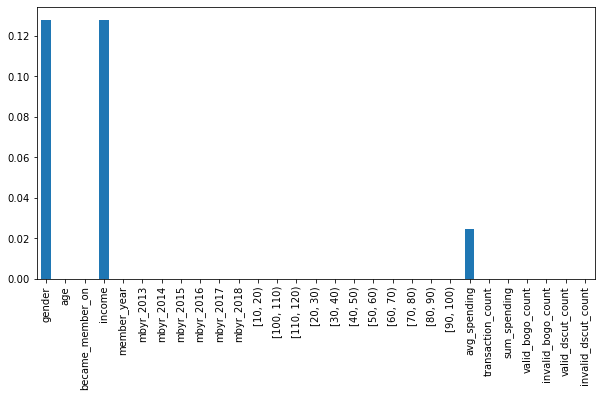

In [59]:
#%% 看看每列缺失多少   Assess missing data in columns

col_null = profile_updated.isnull().sum()

col_null_frac = col_null / profile_updated.shape[0]
plt.figure(figsize= (10,5))
col_null_frac.plot(kind='bar')

In [60]:
#%%  找到并删除 超过0.3比例的空缺列

# cols to drop that have more than 30% missing values
cols_to_drop = col_null_frac[col_null_frac > 0.3].index.tolist()
cols_to_drop

# drop columns in cols_to_drop
profile_up_nomiss = profile_updated.drop(cols_to_drop, axis=1)

[]

<AxesSubplot:>

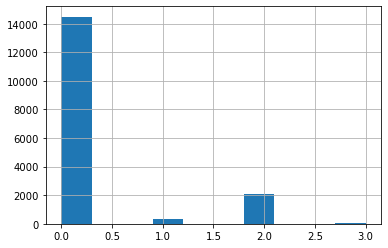

In [61]:
#%% 看看各行 缺失 多少

row_null = profile_up_nomiss.isnull().sum(axis=1)
row_null.hist()

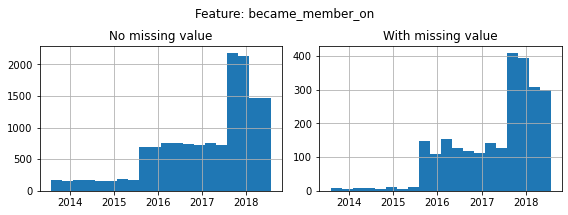

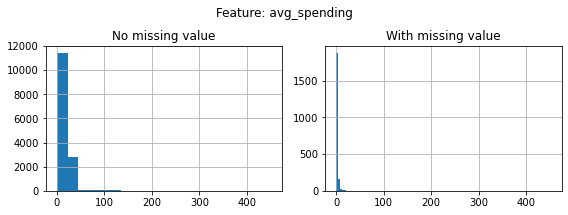

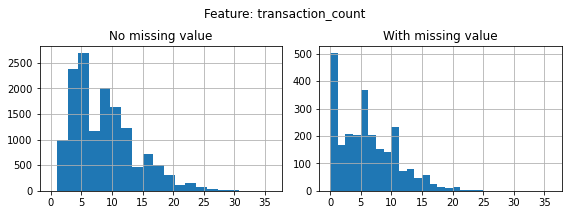

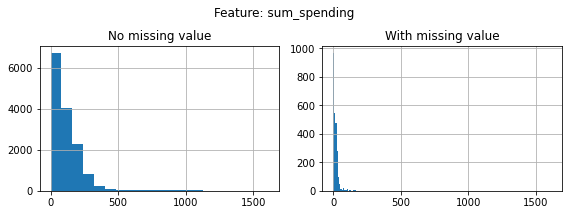

In [62]:
# 观察有缺失行和没缺失行 关心的预测列 hist分布
  
def dist_compare_cont(attribute, data):
    """
    input : 
        attribute: feature / attribute
        data : dataframe
    return : None, only plot the histogram
    """
    # data = profile_updated_  ;  attribute = 'avg_spending'
    row_null = data.isnull().sum(axis=1)
    f, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(8,3))
    ax1 = data[row_null==0][attribute].hist(ax=ax1, bins=20)
    ax2 = data[row_null > 0][attribute].hist( ax=ax2, bins=20)
    ax1.set_title('No missing value')
    ax2.set_title('With missing value')
    f.suptitle('Feature: ' + attribute)
    f.tight_layout()
    f.subplots_adjust(top=0.8)


cols_to_compare = ['became_member_on', 'avg_spending', 'transaction_count', 'sum_spending']

for col in cols_to_compare:
    dist_compare_cont(col, profile_up_nomiss)

- 发现 No missing 和 With missing 两者相比 没有明显差别 可以考虑删除
    
    
- It is found that data with missing and without missing have no obvious difference, the missing rows can be deleted

In [63]:
#%% 删除这部分缺失的行 
profile_up_nomiss = profile_up_nomiss.drop( profile_up_nomiss[row_null > 0].index  , axis=0)
profile_up_nomiss.isnull().sum().sum()

0

## one hot: gender, member_year

array([[<AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'mbyr_2013'}>,
        <AxesSubplot:title={'center':'mbyr_2014'}>,
        <AxesSubplot:title={'center':'mbyr_2015'}>,
        <AxesSubplot:title={'center':'mbyr_2016'}>],
       [<AxesSubplot:title={'center':'mbyr_2017'}>,
        <AxesSubplot:title={'center':'mbyr_2018'}>,
        <AxesSubplot:title={'center':'[10, 20)'}>,
        <AxesSubplot:title={'center':'[100, 110)'}>,
        <AxesSubplot:title={'center':'[110, 120)'}>],
       [<AxesSubplot:title={'center':'[20, 30)'}>,
        <AxesSubplot:title={'center':'[30, 40)'}>,
        <AxesSubplot:title={'center':'[40, 50)'}>,
        <AxesSubplot:title={'center':'[50, 60)'}>,
        <AxesSubplot:title={'center':'[60, 70)'}>],
       [<AxesSubplot:title={'center':'[70, 80)'}>,
        <AxesSubplot:title={'center':'[80, 90)'}>,
        <AxesSubplot:title={'center':'[90, 100)'}>,
        <AxesSubplot:title={'center':'avg_spending'}>,
        <AxesSu

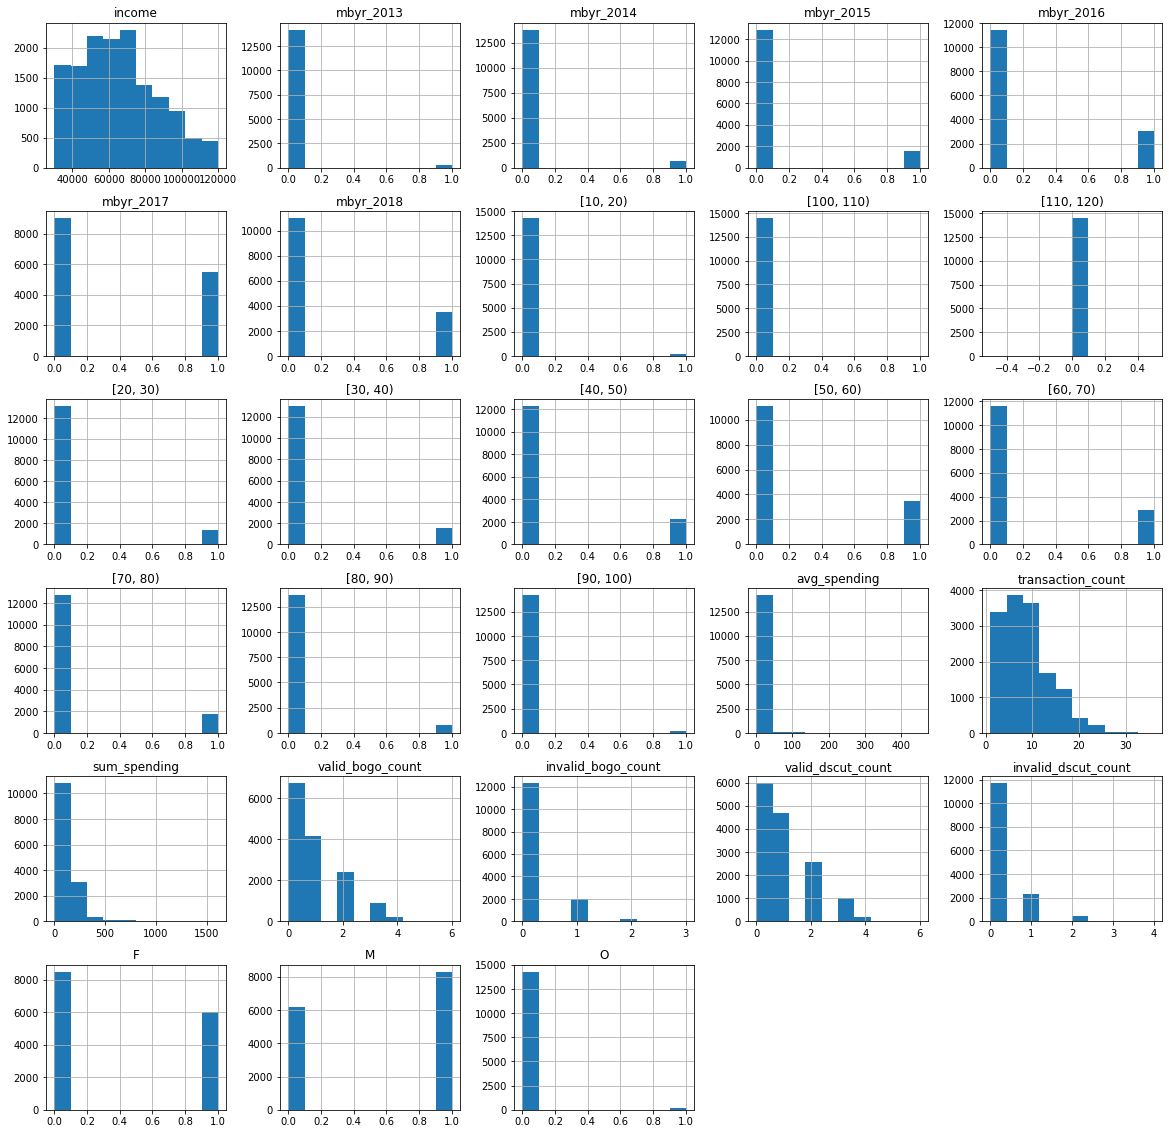

In [64]:
#%% 再次 one hot 编码，主要是 gender 
profile_new = pd.concat( [ profile_up_nomiss , pd.get_dummies(profile_up_nomiss['gender'])] ,axis= 1 ) 
profile_new= profile_new.drop(columns = ['became_member_on','member_year','age','gender'] , axis=1)

profile_new.hist( figsize=(20,20))


In [65]:
profile_new['[110, 120)'].value_counts()
profile_new= profile_new.drop(columns = ['[110, 120)'] , axis=1)

0    14492
Name: [110, 120), dtype: int64

## save结果  profile_new

In [66]:
#%% 保存数据
pklsave(profile_new, 'sav/profile_new.sav')

##  Data analysis 

<AxesSubplot:>

Text(0.5, 1.0, 'Profile Main - Features Correlation')

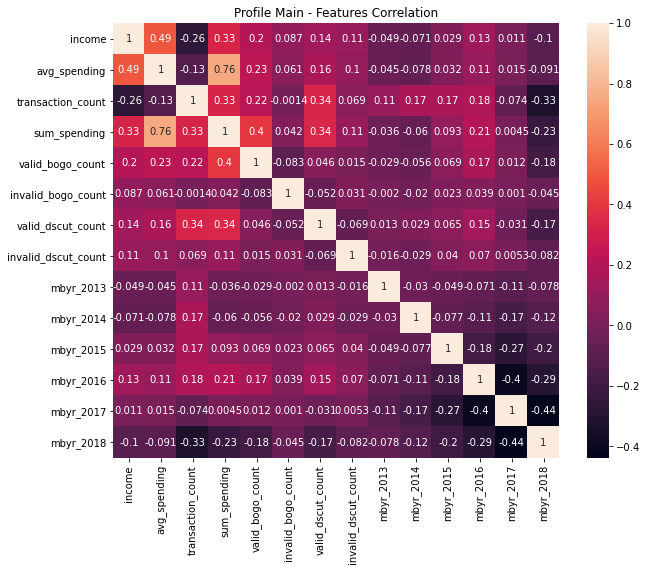

In [67]:
#%% ！！！数据分析 ，热图 EDA 指定列，分别针对<100 >100

cols = [ 'income', 'avg_spending', 'transaction_count', 'sum_spending',
       'valid_bogo_count',   'invalid_bogo_count',   'valid_dscut_count', 'invalid_dscut_count' ,
        'mbyr_2013', 'mbyr_2014', 'mbyr_2015', 'mbyr_2016','mbyr_2017', 'mbyr_2018']
f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_new[cols].corr(), ax=ax, annot=True)
ax.set_title("Profile Main - Features Correlation")


- 除了 income 和 avg_spending 以外，这些特征之间没有很强的关联性

   

# 构造数据集 预测用户收到offer后是否会完成　

## 整理所有offer received的信息

In [68]:
list_validcomp =  pklload('sav/list_validcomp.pkl')
list_invalidcomp =  pklload('sav/list_invalidcomp.pkl')
list_validrec =  pklload('sav/list_validrec.pkl')
profile_updated =  pklload('sav/profile_updated.pkl')
profile_new  = pklload('sav/profile_new.sav')

In [75]:
dfmerge_trprpo = merge_transcript_profile_portfolio(transcript, profile, portfolio)
df_rec_all = dfmerge_trprpo.loc[ dfmerge_trprpo.event == 'offer received',['person','offer_id']]
# 删除 offer_id 和 person 重复的部分
df_rec_new = df_rec_all.drop(  df_rec_all[df_rec_all.duplicated()].index  )
# 确认 重复的部分里 没有 list_validrec
np.intersect1d( df_rec_all[df_rec_all.duplicated()].index , list_validrec )

array([], dtype=int64)

In [76]:
# 添加 validrec 特征
df_rec_new.loc[ :, 'validrec' ] = 0
df_rec_new.loc[ list_validrec, 'validrec' ] =1

In [77]:
# 根据 profile_new 添加 user的特征
df_rec_new = pd.merge(df_rec_new, profile_new, left_on=['person'], right_index=True, how ='inner')
# 根据 portfolio_clean 添加 offer 的特征
portfolio_clean = portfolio_prep( portfolio ) 
df_rec_new = pd.merge(df_rec_new, portfolio_clean, left_on=['offer_id'], right_on=['id'], how ='inner')

## 删除不必要特征

In [78]:
# 删除不必要的 offer 特征
df_rec_new = df_rec_new.drop( columns=['offer_id','id'] )

# 由于 imformation 的 offer是没有完成结果的 不在预测范围内 也删除
index_infor = df_rec_new.loc[ df_rec_new.offername.str.contains('infor'),: ].index
df_rec_new = df_rec_new.drop( index_infor )
df_rec_new.offername.value_counts()

# offername 变为 onehot 特征
df_rec_new = pd.concat( [ df_rec_new , pd.get_dummies(df_rec_new['offername'])] ,axis= 1 ) 
df_rec_new = df_rec_new.drop( columns= 'offername' )
df_rec_new

# offer_type 变为 onehot 特征
df_rec_new = pd.concat( [ df_rec_new , pd.get_dummies(df_rec_new['offer_type'], prefix='tp')] ,axis= 1 ) 
df_rec_new = df_rec_new.drop( columns= 'offer_type' )
df_rec_new

discount_20_10_5    5451
bogo_10_7_10        5446
bogo_5_7_5          5421
discount_10_10_2    5412
discount_7_7_3      5400
bogo_10_5_10        5399
discount_10_7_2     5337
bogo_5_5_5          5316
Name: offername, dtype: int64

,person,validrec,income,mbyr_2013,mbyr_2014,mbyr_2015,mbyr_2016,mbyr_2017,mbyr_2018,"[10, 20)","[100, 110)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)",avg_spending,transaction_count,sum_spending,valid_bogo_count,invalid_bogo_count,valid_dscut_count,invalid_dscut_count,F,M,O,reward,difficulty,duration,offer_type,web,email,mobile,social,bogo_10_5_10,bogo_10_7_10,bogo_5_5_5,bogo_5_7_5,discount_10_10_2,discount_10_7_2,discount_20_10_5,discount_7_7_3
0,78afa995795e4d85b5d9ceeca43f5fef,1,100000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,22.752857,7.0,159.27,3.0,0.0,0.0,0.0,1,0,0,5,5,7,bogo,1,1,1,0,0,0,0,1,0,0,0,0
1,e2127556f4f64592b11af22de27a7932,1,70000.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,19.243333,3.0,57.73,1.0,0.0,1.0,0.0,0,1,0,5,5,7,bogo,1,1,1,0,0,0,0,1,0,0,0,0
2,389bc3fa690240e798340f5a15918d5c,0,53000.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,12.143333,3.0,36.43,2.0,1.0,2.0,0.0,0,1,0,5,5,7,bogo,1,1,1,0,0,0,0,1,0,0,0,0
3,d058f73bf8674a26a95227db098147b1,0,88000.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,25.206667,3.0,75.62,1.0,0.0,3.0,0.0,1,0,0,5,5,7,bogo,1,1,1,0,0,0,0,1,0,0,0,0
4,ebe7ef46ea6f4963a7dd49f501b26779,0,41000.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.006154,13.0,52.08,0.0,0.0,2.0,0.0,0,1,0,5,5,7,bogo,1,1,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53982,3ea76abfb09c4a7db2c38abcb993f862,1,118000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,28.354000,5.0,141.77,1.0,0.0,1.0,0.0,1,0,0,10,10,5,bogo,1,1,1,1,1,0,0,0,0,0,0,0
53983,33d933f005aa41a39673220662db5294,0,62000.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.706000,10.0,37.06,0.0,0.0,0.0,0.0,0,1,0,10,10,5,bogo,1,1,1,1,1,0,0,0,0,0,0,0
53984,8578196a074a4f328976e334fa9383a3,0,58000.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4.620000,1.0,4.62,0.0,0.0,0.0,0.0,0,1,0,10,10,5,bogo,1,1,1,1,1,0,0,0,0,0,0,0
53985,d4b620d3f4be4a7187245c6b571d0f91,0,81000.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,20.747500,8.0,165.98,0.0,0.0,1.0,0.0,1,0,0,10,10,5,bogo,1,1,1,1,1,0,0,0,0,0,0,0


,person,validrec,income,mbyr_2013,mbyr_2014,mbyr_2015,mbyr_2016,mbyr_2017,mbyr_2018,"[10, 20)","[100, 110)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)","[90, 100)",avg_spending,transaction_count,sum_spending,valid_bogo_count,invalid_bogo_count,valid_dscut_count,invalid_dscut_count,F,M,O,reward,difficulty,duration,web,email,mobile,social,bogo_10_5_10,bogo_10_7_10,bogo_5_5_5,bogo_5_7_5,discount_10_10_2,discount_10_7_2,discount_20_10_5,discount_7_7_3,tp_bogo,tp_discount
0,78afa995795e4d85b5d9ceeca43f5fef,1,100000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,22.752857,7.0,159.27,3.0,0.0,0.0,0.0,1,0,0,5,5,7,1,1,1,0,0,0,0,1,0,0,0,0,1,0
1,e2127556f4f64592b11af22de27a7932,1,70000.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,19.243333,3.0,57.73,1.0,0.0,1.0,0.0,0,1,0,5,5,7,1,1,1,0,0,0,0,1,0,0,0,0,1,0
2,389bc3fa690240e798340f5a15918d5c,0,53000.0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,12.143333,3.0,36.43,2.0,1.0,2.0,0.0,0,1,0,5,5,7,1,1,1,0,0,0,0,1,0,0,0,0,1,0
3,d058f73bf8674a26a95227db098147b1,0,88000.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,25.206667,3.0,75.62,1.0,0.0,3.0,0.0,1,0,0,5,5,7,1,1,1,0,0,0,0,1,0,0,0,0,1,0
4,ebe7ef46ea6f4963a7dd49f501b26779,0,41000.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,4.006154,13.0,52.08,0.0,0.0,2.0,0.0,0,1,0,5,5,7,1,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53982,3ea76abfb09c4a7db2c38abcb993f862,1,118000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,28.354000,5.0,141.77,1.0,0.0,1.0,0.0,1,0,0,10,10,5,1,1,1,1,1,0,0,0,0,0,0,0,1,0
53983,33d933f005aa41a39673220662db5294,0,62000.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.706000,10.0,37.06,0.0,0.0,0.0,0.0,0,1,0,10,10,5,1,1,1,1,1,0,0,0,0,0,0,0,1,0
53984,8578196a074a4f328976e334fa9383a3,0,58000.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4.620000,1.0,4.62,0.0,0.0,0.0,0.0,0,1,0,10,10,5,1,1,1,1,1,0,0,0,0,0,0,0,1,0
53985,d4b620d3f4be4a7187245c6b571d0f91,0,81000.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,20.747500,8.0,165.98,0.0,0.0,1.0,0.0,1,0,0,10,10,5,1,1,1,1,1,0,0,0,0,0,0,0,1,0


In [79]:
# 删除不必要的 user特征
df_rec_new = df_rec_new.drop( columns= 'person' )
df_rec_new.columns
len(df_rec_new.columns) 

Index(['validrec', 'income', 'mbyr_2013', 'mbyr_2014', 'mbyr_2015',
       'mbyr_2016', 'mbyr_2017', 'mbyr_2018', '[10, 20)', '[100, 110)',
       '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
       '[80, 90)', '[90, 100)', 'avg_spending', 'transaction_count',
       'sum_spending', 'valid_bogo_count', 'invalid_bogo_count',
       'valid_dscut_count', 'invalid_dscut_count', 'F', 'M', 'O', 'reward',
       'difficulty', 'duration', 'web', 'email', 'mobile', 'social',
       'bogo_10_5_10', 'bogo_10_7_10', 'bogo_5_5_5', 'bogo_5_7_5',
       'discount_10_10_2', 'discount_10_7_2', 'discount_20_10_5',
       'discount_7_7_3', 'tp_bogo', 'tp_discount'],
      dtype='object')

45

In [80]:
# 继续删除更多 user 特征
df_rec_clean = df_rec_new.drop( columns= [ 'avg_spending', 'transaction_count',
       'sum_spending', 'valid_bogo_count', 'invalid_bogo_count',
       'valid_dscut_count', 'invalid_dscut_count']  )
df_rec_clean.columns
len(df_rec_clean.columns) 

Index(['validrec', 'income', 'mbyr_2013', 'mbyr_2014', 'mbyr_2015',
       'mbyr_2016', 'mbyr_2017', 'mbyr_2018', '[10, 20)', '[100, 110)',
       '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
       '[80, 90)', '[90, 100)', 'F', 'M', 'O', 'reward', 'difficulty',
       'duration', 'web', 'email', 'mobile', 'social', 'bogo_10_5_10',
       'bogo_10_7_10', 'bogo_5_5_5', 'bogo_5_7_5', 'discount_10_10_2',
       'discount_10_7_2', 'discount_20_10_5', 'discount_7_7_3', 'tp_bogo',
       'tp_discount'],
      dtype='object')

38

In [81]:
# 删除 offer 特征
df_rec_clean = df_rec_clean.drop( columns= [ 'bogo_10_5_10', 'bogo_10_7_10', 'bogo_5_5_5', 'bogo_5_7_5',
       'discount_10_10_2', 'discount_10_7_2', 'discount_20_10_5',
       'discount_7_7_3']  )
df_rec_clean.columns
len(df_rec_clean.columns) 

Index(['validrec', 'income', 'mbyr_2013', 'mbyr_2014', 'mbyr_2015',
       'mbyr_2016', 'mbyr_2017', 'mbyr_2018', '[10, 20)', '[100, 110)',
       '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
       '[80, 90)', '[90, 100)', 'F', 'M', 'O', 'reward', 'difficulty',
       'duration', 'web', 'email', 'mobile', 'social', 'tp_bogo',
       'tp_discount'],
      dtype='object')

30

## 数据清洗函数

In [93]:
def process_datafeature( df_merge, df_offer, df_profile, list_validrec):
    # df_merge= dfmerge_trprpo ;  df_offer = portfolio_clean; df_profile = profile_updated
    dfmerge_trprpo = df_merge.copy()
    portfolio_clean = df_offer.copy()
    profile_updated = df_profile.copy()
    
    # 添加validrec特征
    df_rec_all = dfmerge_trprpo.loc[ dfmerge_trprpo.event == 'offer received',['person','offer_id']]
    df_rec_new = df_rec_all.drop(  df_rec_all[df_rec_all.duplicated()].index  )
    df_rec_new.loc[ :, 'validrec' ] = 0
    df_rec_new.loc[ list_validrec, 'validrec' ] =1
    # 合并 用户和offer信息
    df_rec_new = pd.merge(df_rec_new, profile_updated, left_on=['person'], right_index = True, how ='inner')
    df_rec_new = pd.merge(df_rec_new, portfolio_clean, left_on=['offer_id'], right_on=['id'], how ='inner')
    
    # 某些列进行 onehot ，删除不需要的列
    index_infor = df_rec_new.loc[ df_rec_new.offername.str.contains('infor'),: ].index
    df_rec_new = df_rec_new.drop( index_infor )
    df_rec_new = pd.concat( [ df_rec_new , pd.get_dummies(df_rec_new['gender'])] ,axis= 1 ) 
    df_rec_new = pd.concat( [ df_rec_new , pd.get_dummies(df_rec_new['offername'])] ,axis= 1 ) 
    df_rec_new = pd.concat( [ df_rec_new , pd.get_dummies(df_rec_new['offer_type'], prefix='tp')] ,axis= 1 ) 

    df_rec_new= df_rec_new.drop(columns = ['became_member_on','member_year','age','gender'] , axis=1)
    df_rec_new= df_rec_new.drop(columns = ['[110, 120)'] , axis=1)

    df_rec_new = df_rec_new.drop( columns=['offer_id','id'] )
    df_rec_new = df_rec_new.drop( columns= 'offer_type' )
    df_rec_new = df_rec_new.drop( columns= 'offername' )
    df_rec_new = df_rec_new.drop( columns= 'person' )
    df_rec_new = df_rec_new.drop( columns= [  'valid_bogo_count', 'invalid_bogo_count',
           'valid_dscut_count', 'invalid_dscut_count']  )
    df_rec_new = df_rec_new.drop( columns= [ 'bogo_10_5_10', 'bogo_10_7_10', 'bogo_5_5_5', 'bogo_5_7_5',
           'discount_10_10_2', 'discount_10_7_2', 'discount_20_10_5',
           'discount_7_7_3']  )    
    
    # 删除空列和空行
    col_null = df_rec_new.isnull().sum()
    col_null_frac = col_null / df_rec_new.shape[0]
    cols_to_drop = col_null_frac[col_null_frac > 0.3].index.tolist()
    df_rec_nomiss = df_rec_new.drop(cols_to_drop, axis=1)
    row_null = df_rec_nomiss.isnull().sum(axis=1)
    df_rec_nomiss = df_rec_nomiss.drop( df_rec_nomiss[row_null > 0].index  , axis=0)
       
    return df_rec_nomiss

In [94]:
df_rec_new  = process_datafeature( dfmerge_trprpo, portfolio_clean, profile_updated, list_validrec)

In [95]:
df_rec_new.columns
len( df_rec_new.columns )

Index(['validrec', 'income', 'mbyr_2013', 'mbyr_2014', 'mbyr_2015',
       'mbyr_2016', 'mbyr_2017', 'mbyr_2018', '[10, 20)', '[100, 110)',
       '[20, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '[70, 80)',
       '[80, 90)', '[90, 100)', 'avg_spending', 'transaction_count',
       'sum_spending', 'reward', 'difficulty', 'duration', 'web', 'email',
       'mobile', 'social', 'F', 'M', 'O', 'tp_bogo', 'tp_discount'],
      dtype='object')

33

In [96]:
pklsave(df_rec_new, 'sav/df_rec_new.pkl')

## 分割数据集

In [97]:

df_rec_new  = pklload('sav/df_rec_new.pkl')

random_state = 42

label_name = 'validrec'
variables = df_rec_new.drop(columns=[label_name])
label = df_rec_new.filter([label_name])

(X_train, X_test, y_train, y_test) = train_test_split(variables.values,
                                        label.values,
                                        test_size=0.2,
                                        random_state=random_state)

X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
y_train = y_train.ravel()
y_test = y_test.ravel()

X_train.shape

(34545, 32)

# 预测模型

### 函数 评估模型


In [128]:
def evaluate_model_performance(clf, X,y):
    """ Prints a model's accuracy and F1-score
    
    INPUT:
        clf: Model object
        X: Training data matrix
        y: Expected model output vector
    
    OUTPUT:
        clf_accuracy: Model accuracy
        clf_f1_score: Model F1-score"""
    
    # clf = lr_random.best_estimator_
    # clf = pipe_lr_clf
    #  class_name 就是单纯的 把很长的模型名字 sklearn.linear_model._logistic.LogisticRegression 
    # 给简化为 'LogisticRegression'而已
    
    y_pred = clf.predict(X)
    fbt_score = fbeta_score( y , y_pred, beta=2)
    print(  'F-beta score: {0:.3f} \n'.format(fbt_score ))
    print( classification_report(y, y_pred))
    return

##   线性分类模型

In [129]:
model_path = os.path.join('sav/pipe_lrsvc.joblib')

if os.path.exists(model_path):
    pipe_lrsvc = load(model_path)
else:
    # 建立模型
    pipe_lrsvc = Pipeline([    ('scaler', MinMaxScaler()), ('clf', LinearSVC()) ])
    pipe_lrsvc.fit(X_train, y_train)
    dump(pipe_lrsvc, model_path)

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', LinearSVC())])

['sav/pipe_lrsvc.joblib']

In [130]:
evaluate_model_performance( pipe_lrsvc ,X_test, y_test)

F-beta score: 0.746 

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      4085
           1       0.76      0.74      0.75      4552

    accuracy                           0.74      8637
   macro avg       0.74      0.74      0.74      8637
weighted avg       0.74      0.74      0.74      8637



### 线性分类模型调参

In [131]:
pipe_lrsvc.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('clf', LinearSVC())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'clf': LinearSVC(),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'clf__C': 1.0,
 'clf__class_weight': None,
 'clf__dual': True,
 'clf__fit_intercept': True,
 'clf__intercept_scaling': 1,
 'clf__loss': 'squared_hinge',
 'clf__max_iter': 1000,
 'clf__multi_class': 'ovr',
 'clf__penalty': 'l2',
 'clf__random_state': None,
 'clf__tol': 0.0001,
 'clf__verbose': 0}

In [136]:
model_path = os.path.join('sav/cv_lrsvc.joblib')

if os.path.exists(model_path):
    cv_lrsvc = load(model_path)
else:
    
    # 设置参数矩阵
    parameters = {
        'clf__dual': [True, False],
        'clf__tol': [1e-4, 1e-5],
        'clf__C':[0.8, 1, 1.2],
        'clf__max_iter': [ 1e3, 3e3, 1e4]  }

    # 评价指标
    scorer = make_scorer( fbeta_score, beta=2 )
    cv_lrsvc = GridSearchCV( pipe_lrsvc , param_grid=parameters,   scoring= scorer )

    # 再训练
    cv_lrsvc.fit( X_train, y_train )
    dump(cv_lrsvc, model_path)
    
# 查看最佳参数
print( cv_lrsvc.best_params_)




GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf', LinearSVC())]),
             param_grid={'clf__C': [0.8, 1, 1.2], 'clf__dual': [True, False],
                         'clf__max_iter': [1000.0, 3000.0, 10000.0],
                         'clf__tol': [0.0001, 1e-05]},
             scoring=make_scorer(fbeta_score, beta=2))

['sav/cv_lrsvc.joblib']

{'clf__C': 1.2, 'clf__dual': True, 'clf__max_iter': 1000.0, 'clf__tol': 0.0001}


In [137]:
# 测试模型结果
evaluate_model_performance(cv_lrsvc, X_test, y_test)

F-beta score: 0.746 

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      4085
           1       0.76      0.74      0.75      4552

    accuracy                           0.74      8637
   macro avg       0.74      0.74      0.74      8637
weighted avg       0.74      0.74      0.74      8637



调参后 F-beta score 还是0.746 没有变化 

##  K近邻算法

In [138]:
model_path = os.path.join('sav/pipe_kmn.joblib')

if os.path.exists(model_path):
    pipe_kmn = load(model_path)
else:
    pipe_kmn = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', KNeighborsClassifier())
    ])
    pipe_kmn.get_params()
    pipe_kmn.fit(X_train, y_train)
    dump(pipe_kmn, model_path)

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('clf', KNeighborsClassifier())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'clf': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'clf__algorithm': 'auto',
 'clf__leaf_size': 30,
 'clf__metric': 'minkowski',
 'clf__metric_params': None,
 'clf__n_jobs': None,
 'clf__n_neighbors': 5,
 'clf__p': 2,
 'clf__weights': 'uniform'}

Pipeline(steps=[('scaler', MinMaxScaler()), ('clf', KNeighborsClassifier())])

['sav/pipe_kmn.joblib']

In [139]:
evaluate_model_performance(pipe_kmn,X_test, y_test )

F-beta score: 0.741 

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      4085
           1       0.74      0.74      0.74      4552

    accuracy                           0.72      8637
   macro avg       0.72      0.72      0.72      8637
weighted avg       0.72      0.72      0.72      8637



### K近邻算法调参

In [140]:
model_path = os.path.join('sav/cv_kmn.joblib')

if os.path.exists(model_path):
    cv_kmn = load(model_path)
else:
    
    # 设置参数矩阵
    parameters = {
        'clf__leaf_size': [10, 30, 100],
        'clf__n_neighbors': [5, 20] ,
        'clf__weights':[ 'uniform', 'distance']
    }
    
    scorer = make_scorer(fbeta_score,beta=2)
    cv_kmn = GridSearchCV(pipe_kmn, param_grid=parameters , scoring= scorer )

    # 再训练
    cv_kmn.fit(X_train, y_train)
    dump(cv_kmn, model_path)


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('clf', KNeighborsClassifier())]),
             param_grid={'clf__leaf_size': [10, 30, 100],
                         'clf__n_neighbors': [5, 20],
                         'clf__weights': ['uniform', 'distance']},
             scoring=make_scorer(fbeta_score, beta=2))

['sav/cv_kmn.joblib']

In [141]:
# 查看最佳参数
cv_kmn.best_params_

# 测试模型结果
evaluate_model_performance(cv_kmn,X_test, y_test )

{'clf__leaf_size': 10, 'clf__n_neighbors': 5, 'clf__weights': 'uniform'}

F-beta score: 0.741 

              precision    recall  f1-score   support

           0       0.71      0.70      0.71      4085
           1       0.74      0.74      0.74      4552

    accuracy                           0.72      8637
   macro avg       0.72      0.72      0.72      8637
weighted avg       0.72      0.72      0.72      8637



K临近算法 调参后 F-beta score 还是0.741 没有变化

## 随机森林模型

In [142]:
model_path = os.path.join('sav/pipe_rf.joblib')

if os.path.exists(model_path):
    pipe_rf = load(model_path)
else:
    pipe_rf = Pipeline([('sc', StandardScaler()),
                      ('rf_clf', RandomForestClassifier(random_state=random_state))
                      ])
    pipe_rf.fit(X_train, y_train)
    dump(pipe_rf, model_path)


Pipeline(steps=[('sc', StandardScaler()),
                ('rf_clf', RandomForestClassifier(random_state=42))])

['sav/pipe_rf.joblib']

In [143]:
evaluate_model_performance(pipe_rf,X_test, y_test )

F-beta score: 0.784 

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4085
           1       0.77      0.79      0.78      4552

    accuracy                           0.76      8637
   macro avg       0.76      0.76      0.76      8637
weighted avg       0.76      0.76      0.76      8637



In [144]:
pipe_rf.get_params()

{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('rf_clf', RandomForestClassifier(random_state=42))],
 'verbose': False,
 'sc': StandardScaler(),
 'rf_clf': RandomForestClassifier(random_state=42),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'rf_clf__bootstrap': True,
 'rf_clf__ccp_alpha': 0.0,
 'rf_clf__class_weight': None,
 'rf_clf__criterion': 'gini',
 'rf_clf__max_depth': None,
 'rf_clf__max_features': 'auto',
 'rf_clf__max_leaf_nodes': None,
 'rf_clf__max_samples': None,
 'rf_clf__min_impurity_decrease': 0.0,
 'rf_clf__min_impurity_split': None,
 'rf_clf__min_samples_leaf': 1,
 'rf_clf__min_samples_split': 2,
 'rf_clf__min_weight_fraction_leaf': 0.0,
 'rf_clf__n_estimators': 100,
 'rf_clf__n_jobs': None,
 'rf_clf__oob_score': False,
 'rf_clf__random_state': 42,
 'rf_clf__verbose': 0,
 'rf_clf__warm_start': False}

### 随机森林调参

In [151]:
model_path = os.path.join('sav/cv_rf.joblib')

if os.path.exists(model_path):
    cv_rf = load(model_path)
else:
    
    # 设置参数矩阵
    parameters = {
         'rf_clf__n_estimators': [ 50, 100, 200],
         'rf_clf__max_depth': [5,10,15],
        'rf_clf__min_samples_split': [10,50,100],
         'rf_clf__min_samples_leaf': [  2, 3, 5] }
    scorer = make_scorer(fbeta_score,beta=2)
    cv_rf = GridSearchCV(pipe_rf, param_grid= parameters , scoring=scorer )

    # 再训练
    cv_rf.fit(X_train, y_train)
    dump(cv_rf, model_path)


GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('rf_clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf_clf__max_depth': [5, 10, 15],
                         'rf_clf__min_samples_leaf': [2, 5, 100],
                         'rf_clf__min_samples_split': [10, 50, 100],
                         'rf_clf__n_estimators': [50, 100, 200]},
             scoring=make_scorer(fbeta_score, beta=2))

['sav/cv_rf.joblib']

In [152]:
evaluate_model_performance(cv_rf,X_test, y_test )

F-beta score: 0.813 

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      4085
           1       0.77      0.82      0.80      4552

    accuracy                           0.78      8637
   macro avg       0.78      0.78      0.78      8637
weighted avg       0.78      0.78      0.78      8637



In [153]:
cv_rf.best_params_

{'rf_clf__max_depth': 10,
 'rf_clf__min_samples_leaf': 2,
 'rf_clf__min_samples_split': 10,
 'rf_clf__n_estimators': 100}

- 随机森林模型调参后 f_beta分数从 0.784 增加到0.813

## Gradient Boosting classifier模型

In [154]:
model_path = os.path.join('sav/pipe_gb.joblib')

if os.path.exists(model_path):
    pipe_gb = load(model_path)
else:
    pipe_gb = Pipeline([('sc', StandardScaler()),
                      ('gb_clf', GradientBoostingClassifier(random_state=random_state))
                      ])
    pipe_gb.fit(X_train, y_train)
    dump(pipe_gb, model_path)
    

Pipeline(steps=[('sc', StandardScaler()),
                ('gb_clf', GradientBoostingClassifier(random_state=42))])

['sav/pipe_gb.joblib']

In [155]:
evaluate_model_performance(pipe_gb,X_test, y_test )
pipe_gb.get_params()

F-beta score: 0.817 

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      4085
           1       0.78      0.83      0.80      4552

    accuracy                           0.78      8637
   macro avg       0.79      0.78      0.78      8637
weighted avg       0.78      0.78      0.78      8637



{'memory': None,
 'steps': [('sc', StandardScaler()),
  ('gb_clf', GradientBoostingClassifier(random_state=42))],
 'verbose': False,
 'sc': StandardScaler(),
 'gb_clf': GradientBoostingClassifier(random_state=42),
 'sc__copy': True,
 'sc__with_mean': True,
 'sc__with_std': True,
 'gb_clf__ccp_alpha': 0.0,
 'gb_clf__criterion': 'friedman_mse',
 'gb_clf__init': None,
 'gb_clf__learning_rate': 0.1,
 'gb_clf__loss': 'deviance',
 'gb_clf__max_depth': 3,
 'gb_clf__max_features': None,
 'gb_clf__max_leaf_nodes': None,
 'gb_clf__min_impurity_decrease': 0.0,
 'gb_clf__min_impurity_split': None,
 'gb_clf__min_samples_leaf': 1,
 'gb_clf__min_samples_split': 2,
 'gb_clf__min_weight_fraction_leaf': 0.0,
 'gb_clf__n_estimators': 100,
 'gb_clf__n_iter_no_change': None,
 'gb_clf__presort': 'deprecated',
 'gb_clf__random_state': 42,
 'gb_clf__subsample': 1.0,
 'gb_clf__tol': 0.0001,
 'gb_clf__validation_fraction': 0.1,
 'gb_clf__verbose': 0,
 'gb_clf__warm_start': False}

### Gradient Boosting模型调参

In [156]:
model_path = os.path.join('sav/cv_gb.joblib')

if os.path.exists(model_path):
    cv_gb = load(model_path)
else:
    
    # 设置参数矩阵
    parameters = {
        'gb_clf__learning_rate': [0.1, 0.05, 0.01],
        'gb_clf__n_estimators': [50, 100, 200] ,
        'gb_clf__max_depth':  [5,10,15] ,
        'gb_clf__min_samples_split': [10,50,100],
  	  	 'gb_clf__min_samples_leaf': [ 1,  3, 5] }
        
#     scorer = make_scorer(fbeta_score,beta=2)
    scorer = make_scorer(fbeta_score,beta=2)
    cv_gb = GridSearchCV(pipe_gb, param_grid= parameters , scoring= scorer )

    # 再训练
    cv_gb.fit(X_train, y_train)
    dump(cv_gb, model_path)


GridSearchCV(estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('gb_clf',
                                        GradientBoostingClassifier(random_state=42))]),
             param_grid={'gb_clf__learning_rate': [0.1, 0.05, 0.01],
                         'gb_clf__max_depth': [5, 10, 15],
                         'gb_clf__min_samples_leaf': [1, 3, 5],
                         'gb_clf__min_samples_split': [10, 50, 100],
                         'gb_clf__n_estimators': [50, 100, 200]},
             scoring=make_scorer(fbeta_score, beta=2))

['sav/cv_gb.joblib']

In [157]:
evaluate_model_performance(cv_gb,X_test, y_test )
cv_gb.best_params_

F-beta score: 0.841 

              precision    recall  f1-score   support

           0       0.82      0.68      0.74      4085
           1       0.75      0.87      0.80      4552

    accuracy                           0.78      8637
   macro avg       0.78      0.77      0.77      8637
weighted avg       0.78      0.78      0.77      8637



{'gb_clf__learning_rate': 0.01,
 'gb_clf__max_depth': 5,
 'gb_clf__min_samples_leaf': 3,
 'gb_clf__min_samples_split': 10,
 'gb_clf__n_estimators': 50}

- GBM 模型调参后 f_beta分数从 0.817 增加到0.841

## 特征重要性

<Figure size 576x576 with 0 Axes>

<AxesSubplot:xlabel='relativeimportance', ylabel='feature'>

Text(0.5, 0, 'Relative Importance')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Random Forest Estimated Feature Importance')

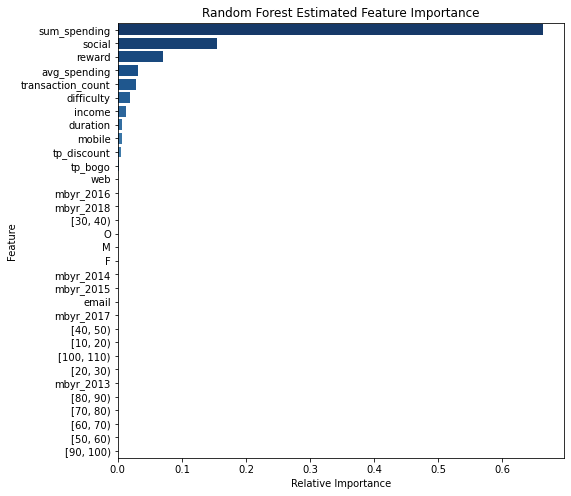

In [162]:
variable_names = df_rec_new.drop(columns=[label_name]).columns

relative_importance = cv_gb.best_estimator_.steps[1][1].feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(variable_names,
                          relative_importance)),
                 columns=['feature', 'relativeimportance'])

feature_importance = feature_importance.sort_values('relativeimportance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

palette = sns.color_palette("Blues_r", feature_importance.shape[0])

plt.figure(figsize=(8, 8))
sns.barplot(x='relativeimportance',
            y='feature',
            data=feature_importance,
            palette=palette)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Random Forest Estimated Feature Importance')

In [163]:
feature_importance.head(n=10)

,feature,relativeimportance
0,sum_spending,0.663410
1,social,0.155110
2,reward,0.070288
3,avg_spending,0.031616
4,transaction_count,0.028052
5,difficulty,0.019514
6,income,0.012870
7,duration,0.006419
8,mobile,0.005922
9,tp_discount,0.004314


- 决定优惠推送对用户是否有效的最关键因素是 用户总消费金额，其次是社交媒体广告，和活动奖励

## 结果汇总

In [167]:
df_model_perfm = pd.DataFrame( columns= ['initial','best_params'])

df_model_perfm.loc['LinearSVC',:] = [ 0.746 ,0.746]
df_model_perfm.loc['KNeighbors',:] = [0.741, 0.741 ]
df_model_perfm.loc['RandomForest',:] = [0.784, 0.813 ]
df_model_perfm.loc['GradientBoosting',:] = [ 0.817 , 0.841]
df_model_perfm

,initial,best_params
LinearSVC,0.746,0.746
KNeighbors,0.741,0.741
RandomForest,0.784,0.813
GradientBoosting,0.817,0.841


# 结论

- 我建立了一个判断某类活动信息是否对用户有效果，即用户在受到活动信息后，是否会采取交易行为的模型。   
- 我解决这个问题分为四个步骤。
  - 首先，我把优惠活动信息，客户资料和客户交易数据结合到一起，根据客户交易数据提取了更多的客户特征。
  - 然后，我根据客户交易信息和优惠活动信息，找出哪些推送活动在有效期内交易（有效完成），哪些推送后没有交易或者在期限外交易（无效完成）。
  - 接着，我比较了线性分类，K临近算法，随机森林和梯度提升模型的性能。结果表明，梯度提升模型具有最佳的F_beta分数,在测试集上为0.841。
  - 梯度提升模型最优参数 'clf__learning_rate': 0.01, 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 10, 'clf__n_estimators': 50
- 遇到的问题和挑战：
  - 最初按照回归问题建立的模型 用来预测每个用户有效完成推送活动的概率，但是样本较少导致预测结果不好。后来改为按照分类模型预测用户是否会有效完成，模型表现提升很多
  - 比较麻烦的是根据每个活动时间限制和用户在该时间内 是否有"接收-浏览-完成"这一系列行为，判断是否为有效完成。
- 可以改进的方面：
  - 上述分类模型 只是判断了特定活动推送对于特定客户是否有效，但是由于缺乏足够信息，没有考察推送次数这一特征和用户有效完成的关系。还可以建立一个回归模型，预测不同推送活动对于不同用户的完成率，从而找出哪些用户在受到信息后可以多次有效消费。